<a href="https://colab.research.google.com/github/Untick/Selector_ObjDet/blob/Trokhachev-Anton-folder/Trokhachev%20Anton/%D0%A2%D1%80%D0%BE%D1%85%D0%B0%D1%87%D0%B5%D0%B2_%D0%90%D0%BD%D1%82%D0%BE%D0%BD_VGG19_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import tensorflow as tf
from keras.layers import Input,Dense,Flatten,Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg19 import VGG19,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import glob
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
from datetime import datetime
from keras.callbacks import ModelCheckpoint
import os
import gdown
from PIL import Image

In [ ]:
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_Selector_newbies/datasets/processed%20extended%20dataset%203.zip', None, quiet=True)
!unzip -qq -o processed%20extended%20dataset%203.zip -d dataset/

In [ ]:
import re

path = 'dataset/processed extended dataset 3' #>>>прописать путь до каталога с каталогами одежды
path_to = 'dataset_new2'

pattern = '.*(?=\.)'
dir_list = os.listdir(path)
if not os.path.isdir(path_to):
     os.mkdir(path_to)
for i in dir_list:
    if not os.path.isdir(f'{path_to}/{i}'):
        os.mkdir(f'{path_to}/{i}')
    fl = os.listdir(f'{path}/{i}')
    for i2 in fl:   #>>>Если нужна неполная версия датасета, заменяем на fl[:50] для 50 файлов в каждом каталоге
        fn = re.match(pattern, i2)
        #print(i2)
        img = f'{path}/{i}/{i2}'
        #print(fn)
        try:
            im = Image.open(img).convert("RGB")
        except:
            print(f'При обработке файла {i}/{i2} произошла ошибка. Файл не читается.')
            pass
        if not os.path.isfile(f'{path_to}/{i}/{fn.group(0)}.jpg'):
            im.save(f'{path_to}/{i}/{fn.group(0)}.jpg', 'jpeg')
        else:
            im.save(f'{path_to}/{i}/{fn.group(0)}ren545.jpg', 'jpeg')
        os.remove(f'{path}/{i}/{i2}')

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
import keras
from sklearn.model_selection import train_test_split 

IMG_WIDTH = 224
IMG_HEIGHT = 224
CHANELS = 3
num_classes = 12

FILE_DIR  = 'dataset_new2'
dir_list = os.listdir(FILE_DIR)
CLASS_LIST = sorted(os.listdir(FILE_DIR))
CLASS_COUNT = len(CLASS_LIST)

image_array = []
data_labels = []
class_label = 0

FILE_DIR  = 'dataset_new2'
dir_list = os.listdir(FILE_DIR)
image_array = []
id_list = []

for i in dir_list:
  file_list = os.listdir(f'dataset_new2/{i}')
  ch = 0
  dl = len(file_list)
  for image in file_list[:50]:
    try:
      img = Image.open(f'dataset_new2/{i}/{image}').resize((IMG_HEIGHT, IMG_WIDTH)).convert("RGB")
      img_np = np.array(img)
      image_array.append(img_np)
      ch += 1
      id_list.append(i)
    except:
      print(f'При обработке файла {i}/{image} произошла ошибка')
      pass
  print(f'Каталог {i} обработан, добавлено {ch} изображений из {dl}')
  data_labels += [class_label] * ch
  class_label += 1

image_array = np.array(image_array)
image_array = image_array.reshape(-1,IMG_HEIGHT,IMG_WIDTH,CHANELS)
image_array = image_array.astype('float32')
image_array /= 255

x_data = image_array
y_data = np.array(data_labels)

#print(x_data.shape)
#print(y_data.shape)

#x_train, x_test, y_train, y_test = train_test_split(x_data, # набор параметров
#                                                    y_data, # набор меток классов
#                                                    shuffle=False,
#                                                    test_size=0.2) # воспроизводимость

x_train = x_data
y_train = y_data

#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)

y_train_cat = keras.utils.to_categorical(y_train, num_classes)
#y_test_cat = keras.utils.to_categorical(y_test, num_classes)

#print(y_train_cat.shape)
#print(y_test_cat.shape)

Каталог sportswear women обработан, добавлено 50 изображений из 1018
Каталог dress  business обработан, добавлено 50 изображений из 942
Каталог trousers women обработан, добавлено 50 изображений из 986
Каталог dress casual обработан, добавлено 50 изображений из 805
Каталог shirt women обработан, добавлено 50 изображений из 1033
Каталог dress homemade обработан, добавлено 50 изображений из 975
Каталог trousers men обработан, добавлено 50 изображений из 1780
Каталог t-shirt men обработан, добавлено 50 изображений из 1069
Каталог dress solemn обработан, добавлено 50 изображений из 1004
Каталог t-shirt women обработан, добавлено 50 изображений из 1171
Каталог sportswear men обработан, добавлено 50 изображений из 906
Каталог shirt men обработан, добавлено 50 изображений из 2863


In [ ]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
CHANELS = 3
num_classes = 12

FILE_DIR  = 'dataset_new2'
dir_list = os.listdir(FILE_DIR)
CLASS_LIST = sorted(os.listdir(FILE_DIR))
CLASS_COUNT = len(CLASS_LIST)

image_array = []
data_labels = []
class_label = 0

FILE_DIR  = 'dataset_new2'
dir_list = os.listdir(FILE_DIR)
image_array = []
id_list = []

for i in dir_list:
  file_list = os.listdir(f'dataset_new2/{i}')
  ch = 0
  dl = len(file_list)
  for image in file_list[50:100]:
    try:
      img = Image.open(f'dataset_new2/{i}/{image}').resize((IMG_HEIGHT, IMG_WIDTH)).convert("RGB")
      img_np = np.array(img)
      image_array.append(img_np)
      ch += 1
      id_list.append(i)
    except:
      print(f'При обработке файла {i}/{image} произошла ошибка')
      pass
  print(f'Каталог {i} обработан, добавлено {ch} изображений из {dl}')
  data_labels += [class_label] * ch
  class_label += 1

image_array = np.array(image_array)
image_array = image_array.reshape(-1,IMG_HEIGHT,IMG_WIDTH,CHANELS)
image_array = image_array.astype('float32')
image_array /= 255

x_data = image_array
y_data = np.array(data_labels)

#print(x_data.shape)
#print(y_data.shape)

#x_train, x_test, y_train, y_test = train_test_split(x_data, # набор параметров
#                                                    y_data, # набор меток классов
#                                                    shuffle=False,
#                                                    test_size=0.2) # воспроизводимость

x_test = x_data
y_test = y_data

#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)

#y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

#print(y_train_cat.shape)
#print(y_test_cat.shape)

Каталог sportswear women обработан, добавлено 50 изображений из 1018
Каталог dress  business обработан, добавлено 50 изображений из 942
Каталог trousers women обработан, добавлено 50 изображений из 986
Каталог dress casual обработан, добавлено 50 изображений из 805
Каталог shirt women обработан, добавлено 50 изображений из 1033
Каталог dress homemade обработан, добавлено 50 изображений из 975
Каталог trousers men обработан, добавлено 50 изображений из 1780
Каталог t-shirt men обработан, добавлено 50 изображений из 1069
Каталог dress solemn обработан, добавлено 50 изображений из 1004
Каталог t-shirt women обработан, добавлено 50 изображений из 1171
Каталог sportswear men обработан, добавлено 50 изображений из 906
Каталог shirt men обработан, добавлено 50 изображений из 2863


In [ ]:
# setting image size 
IMAGE_SIZE = [ 224 , 224 , 3 ]

# Load the model 
vgg = VGG19( include_top = False,
            input_shape = IMAGE_SIZE,
            weights = 'imagenet')

# Visualize the model
vgg.summary()

80134624/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
for  layer in vgg.layers:
    layer.trainable = False

In [130]:
from keras.backend import dropout
#Flattened the last layer
x = Flatten()(vgg.output)
x = Dropout(0.4)(x)
x = Dense( 64 , activation = 'relu' )(x)


# Created a new layer as output
prediction = Dense( 12 , activation = 'softmax' )(x)

# Join it with the model
model = Model( inputs = vgg.input , outputs = prediction )

# Visualize the model again
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [131]:
# defining adam
adam=Adam()

# compining the model
model.compile( loss = 'categorical_crossentropy',
              optimizer = adam,
              metrics = ['accuracy'] )

In [134]:
model_history = model.fit(x=x_train, y=y_train_cat,
                          validation_data = (x_test, y_test_cat),
                          epochs = 30,
                          batch_size = 200,
                          verbose = 2)

Epoch 1/30
3/3 - 6s - loss: 0.2941 - accuracy: 0.9517 - val_loss: 0.8709 - val_accuracy: 0.7033 - 6s/epoch - 2s/step
Epoch 2/30
3/3 - 6s - loss: 0.2882 - accuracy: 0.9450 - val_loss: 0.8510 - val_accuracy: 0.7150 - 6s/epoch - 2s/step
Epoch 3/30
3/3 - 6s - loss: 0.2663 - accuracy: 0.9467 - val_loss: 0.8556 - val_accuracy: 0.7000 - 6s/epoch - 2s/step
Epoch 4/30
3/3 - 8s - loss: 0.2474 - accuracy: 0.9517 - val_loss: 0.8403 - val_accuracy: 0.7083 - 8s/epoch - 3s/step
Epoch 5/30
3/3 - 6s - loss: 0.2349 - accuracy: 0.9600 - val_loss: 0.8399 - val_accuracy: 0.7200 - 6s/epoch - 2s/step
Epoch 6/30
3/3 - 8s - loss: 0.2192 - accuracy: 0.9617 - val_loss: 0.8270 - val_accuracy: 0.7183 - 8s/epoch - 3s/step
Epoch 7/30
3/3 - 6s - loss: 0.2100 - accuracy: 0.9550 - val_loss: 0.8268 - val_accuracy: 0.7167 - 6s/epoch - 2s/step
Epoch 8/30
3/3 - 6s - loss: 0.1911 - accuracy: 0.9683 - val_loss: 0.8279 - val_accuracy: 0.7233 - 6s/epoch - 2s/step
Epoch 9/30
3/3 - 6s - loss: 0.1863 - accuracy: 0.9750 - val_loss

In [141]:
images = x_test
codes = model.predict(images)
assert len(codes) == len(images)

from sklearn.neighbors import NearestNeighbors
#nei_clf = NearestNeighbors(metric="euclidean")
nei_clf = NearestNeighbors(n_neighbors=12, algorithm='ball_tree')
nei_clf.fit(codes)
#print(codes[:1])

19/19 [==============================] - 3s 137ms/step


NearestNeighbors(algorithm='ball_tree', n_neighbors=12)

In [ ]:
def get_similar(image, n_neighbors=5):
    assert image.ndim==3,"image must be [batch,height,width,3]"
    code = code = model.predict(image[None])  
    (distances,),(idx,) = nei_clf.kneighbors(code,n_neighbors=n_neighbors)
    print(idx)
    return distances,images[idx]
def show_similar(num_img):
    image = x_test[num_img]
    distances,neighbors = get_similar(image, n_neighbors=3)
    plt.figure(figsize=[16,14])
    plt.subplot(1,4,1)
    plt.imshow(image)
    plt.title(id_list[num_img])
    
    for i in range(3):
        plt.subplot(1,4,i+2)
        plt.imshow(neighbors[i])
        plt.title("Dist=%.3f"%distances[i])
    plt.show()

show_similar(1)
show_similar(51)
show_similar(101)
show_similar(151)
show_similar(201)
show_similar(251)
show_similar(301)
show_similar(351)
show_similar(401)
show_similar(451)
show_similar(501)
show_similar(551)

1/1 [==============================] - 0s 26ms/step
[ 1 27 47]


In [140]:
image = x_test[501]
assert image.ndim==3
code = model.predict(image[None])  
(distances,),(idx,) = nei_clf.kneighbors(code,n_neighbors=5)
print(f'id похожих изображений: {idx}')
for i in idx:
  print(id_list[i])

1/1 [==============================] - 0s 20ms/step
id похожих изображений: [501 524 576 505 541]
sportswear men
sportswear men
shirt men
sportswear men
sportswear men


In [138]:
def similar_label(num_img):
  image = x_test[num_img]
  assert image.ndim==3
  code = model.predict(image[None])  
  (distances,),(idx,) = nei_clf.kneighbors(code,n_neighbors=5)
  #print(f'id похожих изображений: {idx}')
  return idx

matrix = np.zeros((13, 16))
count = 0
class_list = ['dress  business', 'dress casual', 'dress homemade', 'dress solemn', 'shirt men', 'shirt women', 'sportswear men', 'sportswear women', 't-shirt men', 't-shirt women', 'trousers men', 'trousers women']
for i in class_list:
  count += 1
  matrix[0, count] = count
  matrix[count, 0] = count

count = 0
print('Легенда: каждому классу присвоен номер:')
for i in class_list:
  count += 1
  print(f'{count}:{i}')
print('В левом столбце отображаются классы проверяемых изображений.')
print('В верхней строке отображены классы с ошибочным определением, т.е. если НС ошибается, то куда ошибается.')
print(' ')

count = 0
while count < len(x_test):
  ref = []
  pattern = f'(?<={path_to}/).*?(?=/)'
  orig = id_list[count]
  #print(orig)
  #print(orig[0])
  det = similar_label(count)
  #print(det)
  #det = {10: 'dataset/dress  business/119.jpg', 2266: 'dataset/dress casual/108 (3).jpg', 2527: 'dataset/dress solemn/305 (2).jpg', 2644: 'dataset/dress solemn/500 (2).jpg', 2417: 'dataset/dress solemn/2 (5).jpg'}
  for iii in det:
    ref.append(id_list[iii])
  #print(ref)
  orig_count = class_list.index(orig) + 1
  #print(orig)
  del ref[0]
  #print(ref)
  for i in ref:
    #print(f'{i} = {orig}')
    if not i == orig:
      n = class_list.index(i) +1
      #print(orig)
      #print(i)
      #print(orig_count)
      #print(n)
      matrix[orig_count, n] += 1
      matrix[orig_count, 13] += 1
      matrix[orig_count, 14] += 1
    else:
      matrix[orig_count, 14] += 1
  count += 1

print(matrix)

matrix2 = matrix
matrix2.astype(int)
matrix2.astype(np.int64)
np.savetxt(f'VGG19_trained.txt',matrix2, fmt='%d')



Легенда: каждому классу присвоен номер:
1:dress  business
2:dress casual
3:dress homemade
4:dress solemn
5:shirt men
6:shirt women
7:sportswear men
8:sportswear women
9:t-shirt men
10:t-shirt women
11:trousers men
12:trousers women
В левом столбце отображаются классы проверяемых изображений.
В верхней строке отображены классы с ошибочным определением, т.е. если НС ошибается, то куда ошибается.
 
1/1 [==============================] - 0s 35ms/step
[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.   0.
    0.   0.]
 [  1.   0.  24.   6.  22.   0.   3.   0.   0.   1.   7.   0.   1.  64.
  200.   0.]
 [  2.  30.   0.  39.  20.   1.   2.   0.   0.   1.   3.   1.   4. 101.
  200.   0.]
 [  3.  13.  38.   0.   5.   5.   3.   2.   2.   5.   7.   1.   3.  84.
  200.   0.]
 [  4.  27.  17.   5.   0.   1.   3.   4.   0.   0.   4.   0.   4.  65.
  200.   0.]
 [  5.   0.   2.   5.   1.   0.  32.  15.   4.   5.   2.   0.   0.  66.
  200.   0.]
 [  6.   2.   3.   4.   1.  41.   0.  1

In [ ]:
#Далее в разработке

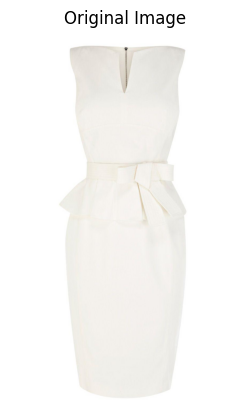

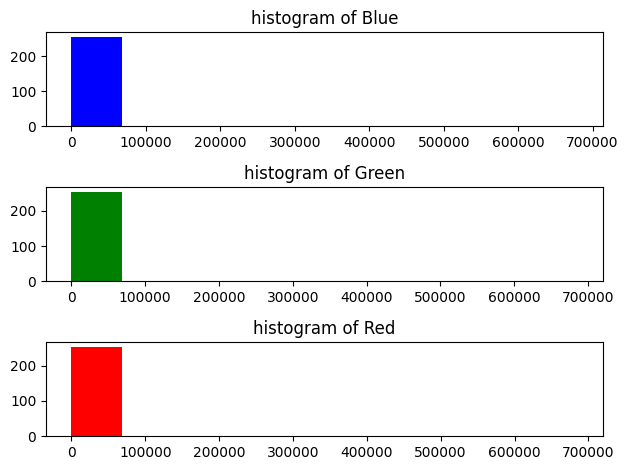

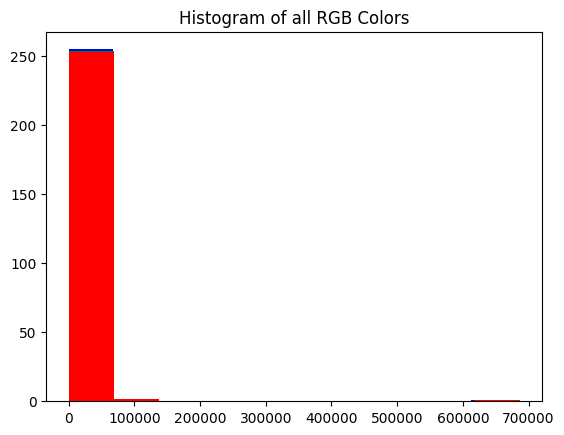

In [ ]:
# import necessary packages
import cv2
import matplotlib.pyplot as plt
  
# load image
imageObj = cv2.imread('/content/dataset_new2/dress  business/1 (3).jpg')
# to avoid grid lines
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()
  
# Get RGB data from image
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])
  
# Separate Histograms for each color
plt.subplot(3, 1, 1)
plt.title("histogram of Blue")
plt.hist(blue_color, color="blue")
  
plt.subplot(3, 1, 2)
plt.title("histogram of Green")
plt.hist(green_color, color="green")
  
plt.subplot(3, 1, 3)
plt.title("histogram of Red")
plt.hist(red_color, color="red")
  
# for clear view
plt.tight_layout()
plt.show()
  
# combined histogram
plt.title("Histogram of all RGB Colors")
plt.hist(blue_color, color="blue")
plt.hist(green_color, color="green")
plt.hist(red_color, color="red")
plt.show()

In [ ]:
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])


rgb_gist = [red_color, green_color, blue_color]
rgb_gist_np = np.array(rgb_gist).reshape(-1,256,3)
rgb_gist_np = rgb_gist_np.astype('float32')
rgb_gist_np /= 255

print(rgb_gist_np.shape)

x_color = 

[[7.]
 [3.]
 [2.]
 [1.]
 [3.]
 [2.]
 [5.]
 [0.]
 [2.]
 [2.]]
(100, 1)
(100, 1)
(100, 1)
(1, 100, 3)
[[[1.17647061e-02 1.17647061e-02 1.17647061e-02]
  [3.92156886e-03 3.92156886e-03 1.17647061e-02]
  [1.17647061e-02 1.56862754e-02 1.56862754e-02]
  [0.00000000e+00 0.00000000e+00 7.84313772e-03]
  [0.00000000e+00 3.92156886e-03 3.92156886e-03]
  [0.00000000e+00 1.17647061e-02 1.56862754e-02]
  [0.00000000e+00 0.00000000e+00 3.92156886e-03]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [3.92156886e-03 7.84313772e-03 1.17647061e-02]
  [7.84313772e-03 3.92156886e-03 3.92156886e-03]
  [7.84313772e-03 0.00000000e+00 2.35294122e-02]
  [7.84313772e-03 0.00000000e+00 1.17647061e-02]
  [1.56862754e-02 1.56862754e-02 1.17647061e-02]
  [1.17647061e-02 1.56862754e-02 2.35294122e-02]
  [7.84313772e-03 1.56862754e-02 1.56862754e-02]
  [1.96078438e-02 1.96078438e-02 1.56862754e-02]
  [7.84313753e-02 3.13725509e-02 4.31372561e-02]
  [7.84313753e-02 5.88235296e-02 1.09803922e-01]
  [1.13725491e-01 

In [ ]:
import numpy as np
import cv2

img = cv2.imread('/content/dataset_new2/dress  business/1 (3).jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()